Use a customer segmentation dataset. Apply K-Means and Hierarchical Clustering.
Compare clustering results, visualize cluster assignments, and interpret insights for
business decision-making.

--- Data Head ---
   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40

--- Finding Optimal K for K-Means ---


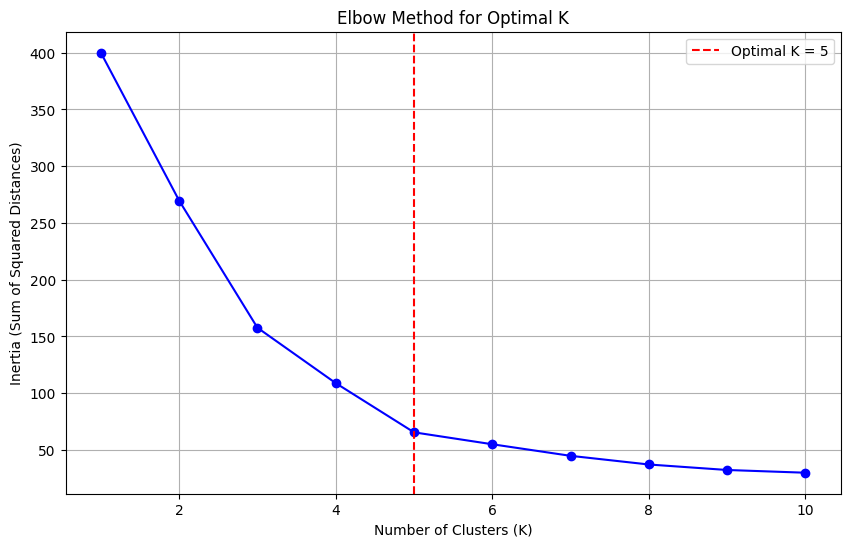

K-Means clustering complete with K=5.

--- Generating Dendrogram for Hierarchical Clustering ---


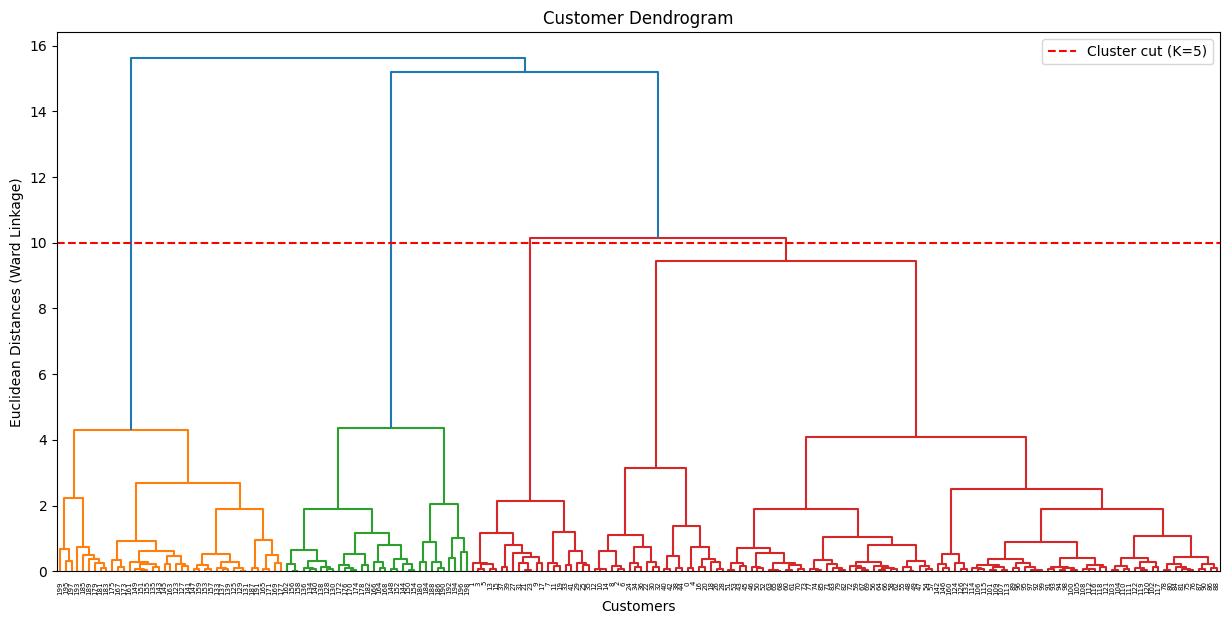

Hierarchical clustering complete with K=5.

Adjusted Rand Score (Similarity): 0.9420


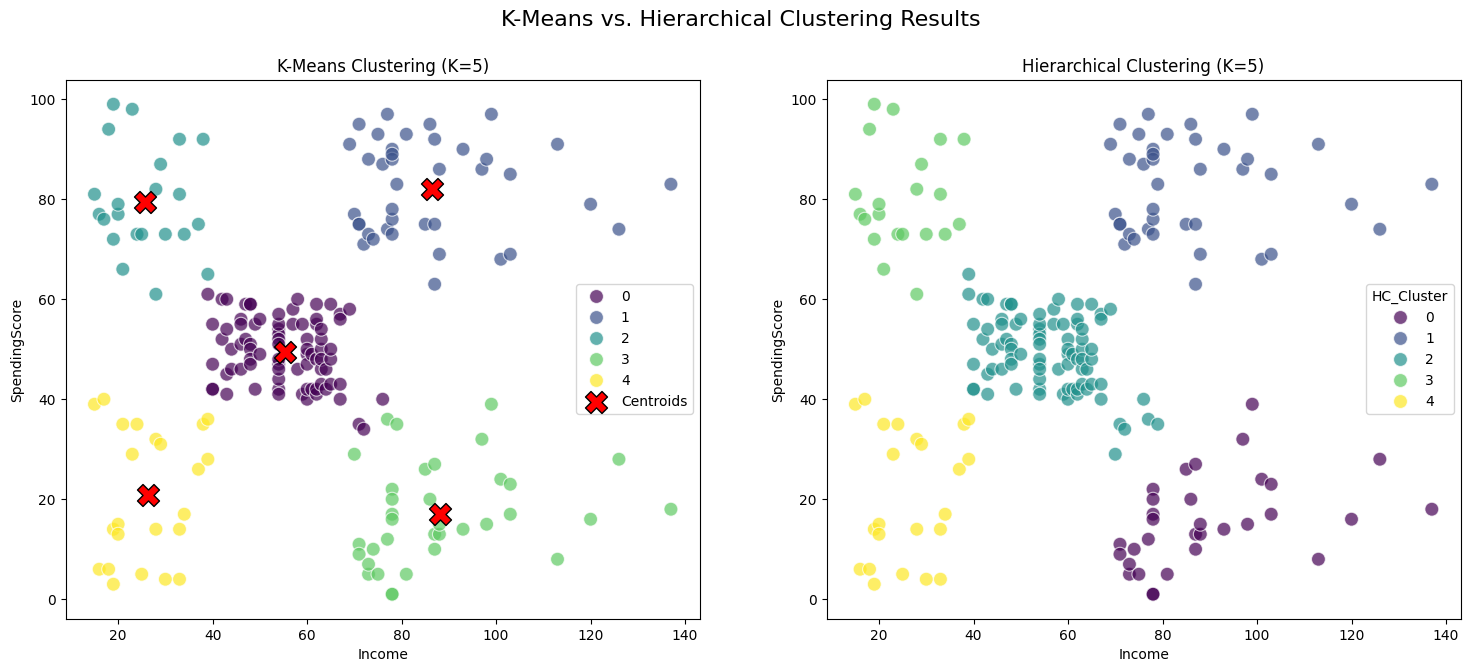


--- Cluster Analysis (K-Means) ---
                Income  SpendingScore    Age
KMeans_Cluster                              
0                55.30          49.52  42.72
1                86.54          82.13  32.69
2                25.73          79.36  25.27
3                88.20          17.11  41.11
4                26.30          20.91  45.22


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import scipy.cluster.hierarchy as sch

# --- 1. Load and Prepare Data ---

url = 'https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv'
df = pd.read_csv(url)

# Rename columns for simplicity
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

print("--- Data Head ---")
print(df.head())

# Select the features for clustering
X = df[['Income', 'SpendingScore']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. K-Means Clustering ---
print("\n--- Finding Optimal K for K-Means ---")
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.axvline(x=5, color='red', linestyle='--', label='Optimal K = 5')
plt.legend()
plt.grid(True)
plt.show()

# --- Fit the final K-Means model ---
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = y_kmeans
print(f"K-Means clustering complete with K={optimal_k}.")


# --- 3. Hierarchical Clustering ---
print("\n--- Generating Dendrogram for Hierarchical Clustering ---")
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances (Ward Linkage)')
plt.axhline(y=10, color='red', linestyle='--', label='Cluster cut (K=5)')
plt.legend()
plt.show()

# --- Fit the final Hierarchical model ---
# [FIX] Removed the 'affinity' parameter, as it's not used with 'ward' linkage
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
y_hc = hc.fit_predict(X_scaled)
df['HC_Cluster'] = y_hc
print(f"Hierarchical clustering complete with K={optimal_k}.")

# --- 4. Compare and Visualize Clusters ---
ars = adjusted_rand_score(df['KMeans_Cluster'], df['HC_Cluster'])
print(f"\nAdjusted Rand Score (Similarity): {ars:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# K-Means Plot
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='KMeans_Cluster', 
                palette='viridis', ax=ax1, s=100, alpha=0.7)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax1.scatter(centroids[:, 0], centroids[:, 1], s=250, c='red', marker='X', 
            label='Centroids', ec='black')
ax1.set_title(f'K-Means Clustering (K={optimal_k})')
ax1.legend()

# Hierarchical Plot
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='HC_Cluster', 
                palette='viridis', ax=ax2, s=100, alpha=0.7)
ax2.set_title(f'Hierarchical Clustering (K={optimal_k})')

plt.suptitle('K-Means vs. Hierarchical Clustering Results', fontsize=16)
plt.show()

# --- 5. Cluster Analysis ---
print("\n--- Cluster Analysis (K-Means) ---")
cluster_analysis = df.groupby('KMeans_Cluster')[['Income', 'SpendingScore', 'Age']].mean().round(2)
print(cluster_analysis)